# Importation du dataset nettoyé

In [15]:
import pandas as pd

df = pd.read_csv('preprocessed_dataset.csv')
df.head()

,Mp,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,...,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_B,Fm_E,Fm_F,Fm_H,Fm_M,Fm_P
0,0.148611,993.0,117.0,2492.0,1455.0,999.0,48.0,0.0,1.09,5.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.148611,993.0,117.0,2492.0,1455.0,999.0,48.0,0.0,1.09,5.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.148611,993.0,117.0,2492.0,1455.0,999.0,48.0,0.0,1.09,5.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.148611,993.0,117.0,2492.0,1455.0,999.0,48.0,0.0,1.09,5.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.148611,993.0,117.0,2492.0,1455.0,999.0,48.0,0.0,1.09,5.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df = df.dropna()

# Séparation en jeu d'entrainement et jeu de test

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(axis=1, columns=['Ewltp (g/km)'])
y = df['Ewltp (g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Normalisation par MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# I. Modélisation

## 1. Régression

### a) LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

resultat_lr = {"MAE": lr_mae, "MSE": lr_mse, "RMSE": lr_rmse, "R2": lr_r2}

print(resultat_lr)

{'MAE': 1.289301355713608, 'MSE': 3.841155833958648, 'RMSE': 1.9598866890610407, 'R2': 0.9983138442614341}


### b) DecisionTreeRegressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred)

resultat_dt = {"MAE": dt_mae, "MSE": dt_mse, "RMSE": dt_rmse, "R2": dt_r2}

print(resultat_dt)

{'MAE': 0.30756014662043885, 'MSE': 0.27717563777837606, 'RMSE': 0.5264747266283312, 'R2': 0.9998783279532429}


### c) RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred)

resultat_rf = {"MAE": rf_mae, "MSE": rf_mse, "RMSE": rf_rmse, "R2": rf_r2}

print(resultat_rf)

{'MAE': 0.30791648416264455, 'MSE': 0.25525716614161925, 'RMSE': 0.5052298151748561, 'R2': 0.9998879495250637}


### d) XGBoostRegressor

In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred)

resultat_xgb = {"MAE": xgb_mae, "MSE": xgb_mse, "RMSE": xgb_rmse, "R2": xgb_r2}

print(resultat_xgb)

{'MAE': 0.47519932430949735, 'MSE': 0.461255024437096, 'RMSE': 0.6791575843919406, 'R2': 0.9997975224541735}


## Comparaison des modèles

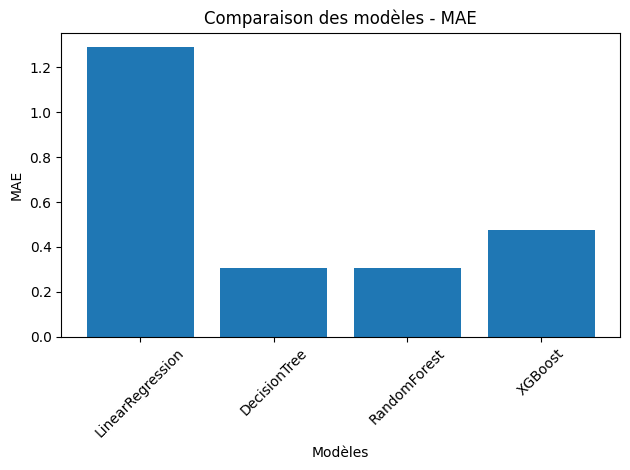

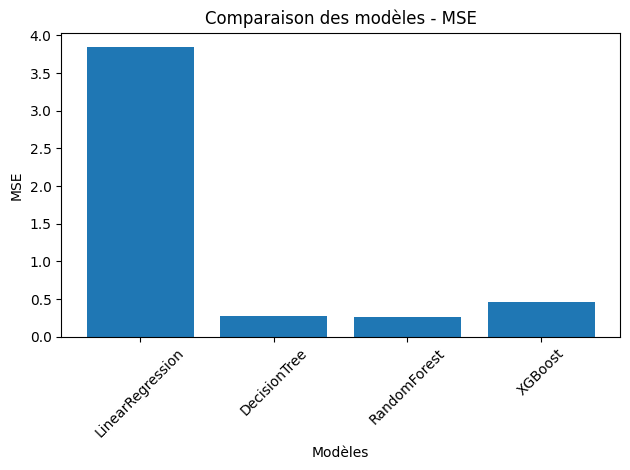

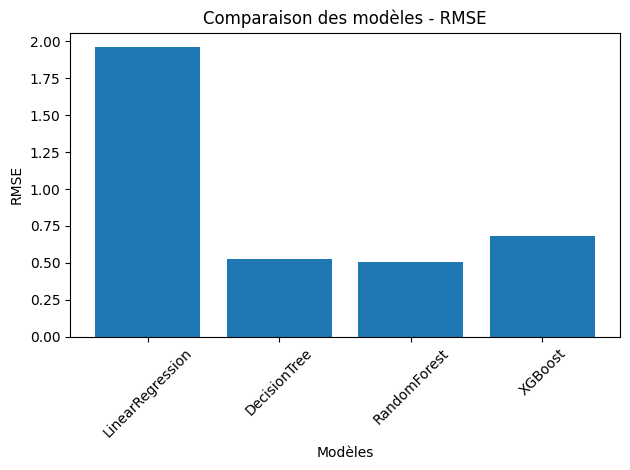

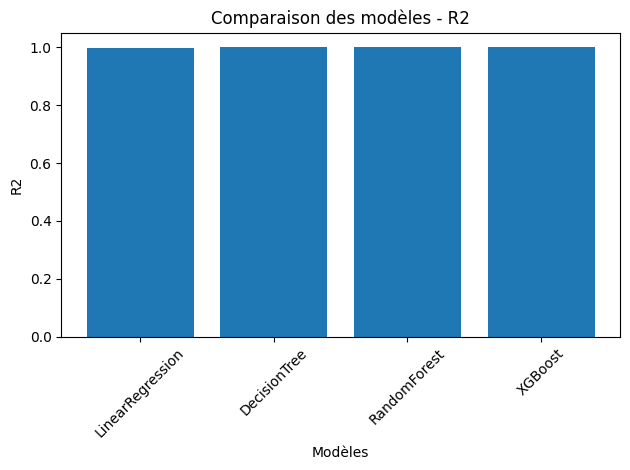

In [28]:
import matplotlib.pyplot as plt

results = {}

results["LinearRegression"] = resultat_lr
results["DecisionTree"] = resultat_dt
results["RandomForest"] = resultat_rf
results["XGBoost"] = resultat_xgb

metrics = ["MAE", "MSE", "RMSE", "R2"]

models = list(results.keys())

values = {metric: [results[model][metric] for model in models] for metric in metrics}

# Création des graphiques de comparaison
for metric in metrics:
    plt.figure()
    plt.bar(models, values[metric])
    plt.title(f"Comparaison des modèles - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Modèles")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# II. Optimisation par GridSearchCV du DecisionTreeRegressor

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur modèle entraîné
best_model = grid_search.best_estimator_

# Évaluer le modèle optimisé
y_pred_optimized = best_model.predict(X_test)
dt_mae_opt = mean_absolute_error(y_test, y_pred_optimized)
dt_mse_opt = mean_squared_error(y_test, y_pred_optimized)
dt_rmse_opt = np.sqrt(dt_mse_opt)
dt_r2_opt = r2_score(y_test, y_pred_optimized)

resultat_opt = {"MAE": dt_mae_opt, "MSE": dt_mse_opt, "RMSE": dt_rmse_opt, "R2": dt_r2_opt}
print("Résultats du modèle optimisé :", resultat_opt)

NameError: name 'dt' is not defined